# Libraries and files

In [1]:
#import libraries and files
import pandas as pd
import operator
import cv2
import csv
import math
import matplotlib.pyplot as plt  # standard Python plotting library
import numpy as np  # package for scientific computing, handles arrays and math
import matplotlib.gridspec as gs
from scipy.optimize import curve_fit
import seaborn as sns
from tdt import read_block

tpath = 9 #total experiments

#photometry path and file
FOLDER_PATH = 'E:/Bruchas_lab/Lab_photometry/Li_fear_box_triggered-220602-095047/'

FOLDER_NAME = [0 for i in range(tpath)]
FOLDER_NAME[0] = '159459-R-221006-091824'
FOLDER_NAME[1] = '159459-L-221020-102241'
FOLDER_NAME[2] = '159459-BL-221018-091752'
FOLDER_NAME[3] = '151653-R-221005-112408'
FOLDER_NAME[4] = '151653-L-221019-114353'
FOLDER_NAME[5] = '151653-RR-221012-102704'
FOLDER_NAME[6] = '151652-L-221011-091017'
FOLDER_NAME[7] = '151652-RR-221018-121215'
FOLDER_NAME[8] = '151653-LL-221101-100649'


print("FOLDER_NAME: ", FOLDER_NAME)
BLOCK_PATH = [0 for i in range(tpath)]
BLOCK_PATH[0] = FOLDER_PATH + FOLDER_NAME[0]
BLOCK_PATH[1] = FOLDER_PATH + FOLDER_NAME[1]
BLOCK_PATH[2] = FOLDER_PATH + FOLDER_NAME[2]
BLOCK_PATH[3] = FOLDER_PATH + FOLDER_NAME[3]
BLOCK_PATH[4] = FOLDER_PATH + FOLDER_NAME[4]
BLOCK_PATH[5] = FOLDER_PATH + FOLDER_NAME[5]
BLOCK_PATH[6] = FOLDER_PATH + FOLDER_NAME[6]
BLOCK_PATH[7] = FOLDER_PATH + FOLDER_NAME[7]
BLOCK_PATH[8] = FOLDER_PATH + FOLDER_NAME[8]


#Path to videos
VIDEO_PATH = [0 for i in range(tpath)]
VIDEO_PATH[0] = BLOCK_PATH[0]+'/'+'Li_photo_stim_1_camera_-220601-092827_159459-R-221006-091824_Cam1.avi'
VIDEO_PATH[1] = BLOCK_PATH[1]+'/'+'Li_photo_stim_1_camera_-220601-092827_159459-L-221020-102241_Cam1.avi'
VIDEO_PATH[2] = BLOCK_PATH[2]+'/'+'Li_photo_stim_1_camera_-220601-092827_159459-BL-221018-091752_Cam1.avi'
VIDEO_PATH[3] = BLOCK_PATH[3]+'/'+'Li_photo_stim_1_camera_-220601-092827_151653-R-221005-112408_Cam1.avi'
VIDEO_PATH[4] = BLOCK_PATH[4]+'/'+'Li_photo_stim_1_camera_-220601-092827_151653-L-221019-114353_Cam1.avi'
VIDEO_PATH[5] = BLOCK_PATH[5]+'/'+'Li_photo_stim_1_camera_-220601-092827_151653-RR-221012-102704_Cam1.avi'
VIDEO_PATH[6] = BLOCK_PATH[6]+'/'+'Li_photo_stim_1_camera_-220601-092827_151652-L-221011-091017_Cam1.avi'
VIDEO_PATH[7] = BLOCK_PATH[7]+'/'+'Li_photo_stim_1_camera_-220601-092827_151652-RR-221018-121215_Cam1.avi'
VIDEO_PATH[8] = BLOCK_PATH[8]+'/'+'Li_photo_stim_1_camera_-220601-092827_151653-LL-221101-100649_Cam1.avi'

#Behavior Deeplabcut file
BEHAVE_PATH = 'E:/Bruchas_lab/Lab_DLC/'
BEHAVE_NAME = [0 for i in range(tpath)]
BEHAVE_NAME[0] = 'Li_photo_stim_1_camera_-220601-092827_159459-R-221006-091824_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[1] = 'Li_photo_stim_1_camera_-220601-092827_159459-L-221020-102241_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[2] = 'Li_photo_stim_1_camera_-220601-092827_159459-BL-221018-091752_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[3] = 'Li_photo_stim_1_camera_-220601-092827_151653-R-221005-112408_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[4] = 'Li_photo_stim_1_camera_-220601-092827_151653-L-221019-114353_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[5] = 'Li_photo_stim_1_camera_-220601-092827_151653-RR-221012-102704_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[6] = 'Li_photo_stim_1_camera_-220601-092827_151652-L-221011-091017_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[7] = 'Li_photo_stim_1_camera_-220601-092827_151652-RR-221018-121215_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'
BEHAVE_NAME[8] = 'Li_photo_stim_1_camera_-220601-092827_151653-LL-221101-100649_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'

print("\033[1m", tpath, " Experiments: "+"\033[0m")
for i in range(tpath):
    print(i+1,".", FOLDER_NAME[i])
print("Done")


FOLDER_NAME:  ['159459-R-221006-091824', '159459-L-221020-102241', '159459-BL-221018-091752', '151653-R-221005-112408', '151653-L-221019-114353', '151653-RR-221012-102704', '151652-L-221011-091017', '151652-RR-221018-121215', '151653-LL-221101-100649']
 9  Experiments: 
1 . 159459-R-221006-091824
2 . 159459-L-221020-102241
3 . 159459-BL-221018-091752
4 . 151653-R-221005-112408
5 . 151653-L-221019-114353
6 . 151653-RR-221012-102704
7 . 151652-L-221011-091017
8 . 151652-RR-221018-121215
9 . 151653-LL-221101-100649
Done


# Photometry analysis

 # 1  Name:  159459-R-221006-091824 
read from t=0s to t=3060.98s
470A/405A sampling frequency:  1017.2526245117188
Total time:  3060.9191119016177
y =  0.8831554183294826 *x +  26.170501759370428
3. Removing outlier...
Number of outliers changed to NaN:  0
Done.
Median:  -0.20996529733155295  +/- Std: 0.24328489680304294
Image:  640  x  480  at  10.0 frames/s x  30613.0  frames
Total time:  3060.9191119016177 Frame interval:  0.0999908242487135
 # 2  Name:  159459-L-221020-102241 
read from t=0s to t=3182.84s
470A/405A sampling frequency:  1017.2526245117188
Total time:  3182.8475267430495
y =  1.2006666730904927 *x +  -37.02892903540114
3. Removing outlier...
Number of outliers changed to NaN:  212
Done.
Median:  -0.8055202748906756  +/- Std: 1.3963498760180448
Image:  640  x  480  at  10.0 frames/s x  27520.0  frames
Total time:  3182.8475267430495 Frame interval:  0.1156599995182619
 # 3  Name:  159459-BL-221018-091752 
read from t=0s to t=3246.08s
470A/405A sampling frequency:  10

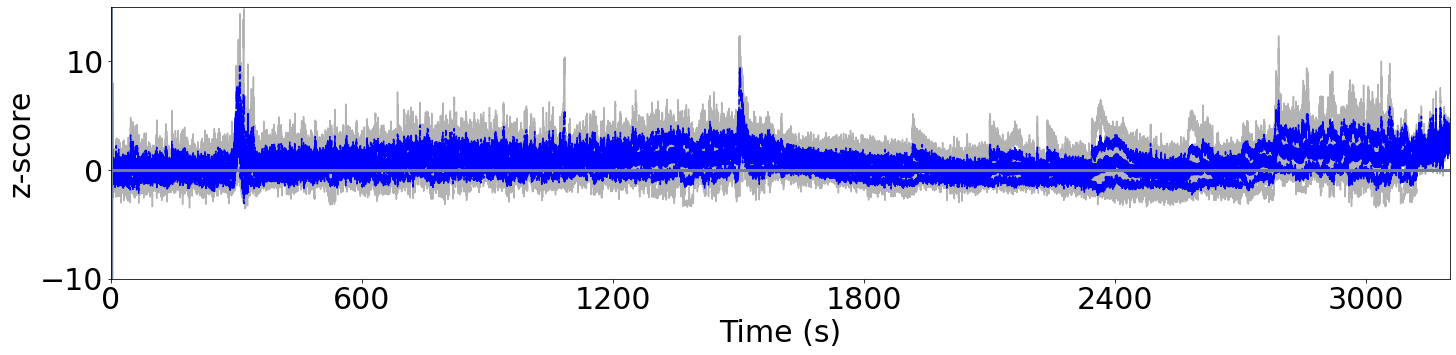

In [2]:
#Photometry z-score normalization for analysis

base_start = [60,60,60,60,60,60,60,60,60]
base_end = [300,300,300,300,300,300,300,300,300]
femerge = [0 for i in range(tpath)]
femerge = [27902,29400,27842,28500,28511,27855,27314,27371,27935] #RORR end
dF_F_outlier = 100 #dF_F outlier removal threshold
aligned_data = [0 for i in (range(tpath+1))]

for j in range(tpath):
    cpath = j # current path
    print("\033[1m","#", j+1, " Name: ", FOLDER_NAME[cpath],"\033[0m")
    data = read_block(BLOCK_PATH[cpath])
    
    #sample size and frequency
    data_470 = data.streams._470A.data
    data_405 = data.streams._405A.data
    size_470A = len(data_470)
    size_405A = len(data_405) #isosbestic channel
    freq_470A = data.streams._470A.fs #sampling frequency
    print("470A/405A sampling frequency: ", freq_470A)
    time_470A = np.linspace(1, size_470A, size_470A) / freq_470A
    time_405A = np.linspace(1, size_405A, size_405A) / freq_470A
    total_time = time_470A[size_470A-1]
    print("Total time: ", total_time)
    fit_window = size_470A
    avg_window = 180
    
    #Fit 405 nm trace to 470 nm by applying least-squares fit
    #Linear least square fit
    Sum_f = 0 #f is 405A
    Sum_g = 0 #g is 470A
    Sum_fg = 0 # fg is 405A*407A
    Sum_fsq = 0 #fsq is f^2 or 405A^2
    for i in range(fit_window):
        Sum_f = Sum_f + data_405[i]
        Sum_g = Sum_g + data_470[i]
        Sum_fg = Sum_fg + data_405[i]*data_470[i]
        Sum_fsq = Sum_fsq + (data_405[i])*(data_405[i])

    #Slope*x + Intercept = y
    Slope = (Sum_f*Sum_g - size_470A*Sum_fg)/(Sum_f*Sum_f - size_470A*Sum_fsq)
    Intercept = (Sum_g*Sum_fsq - Sum_f*Sum_fg)/(size_470A*Sum_fsq - Sum_f*Sum_f)
    print("y = ", Slope, "*x + ", Intercept)

    Fit_405A = [0 for i in range(size_470A)]
    dF_F = [0 for i in range(size_470A)]
    for i in range(size_470A):
        Fit_405A[i] = Slope*data_405[i] + Intercept
        dF_F[i] = (data_470[i] - Fit_405A[i])*100/Fit_405A[i]

    #Outlier removal
    print("\033[1m"+"Removing outlier..."+"\033[0m")
    count = 0
    for i in range(size_470A):
        if abs(dF_F[i])>dF_F_outlier:
            dF_F[i] = np.NaN
            count = count + 1
        #endif
    #end for i
    print("Number of outliers changed to NaN: ", count)
    print("Done.")        
        
    avg_F = np.nanmedian(dF_F[int(base_start[j]*freq_470A):int(base_end[j]*freq_470A)])
    std_F = np.nanstd(dF_F[int(base_start[j]*freq_470A):int(base_end[j]*freq_470A)])
    print("Median: ", avg_F, " +/- Std:", std_F)

    for i in range(size_470A):
        dF_F[i] = (dF_F[i] - avg_F)/std_F

    if j==0:
        max_size = len(time_470A)
        aligned_data[0] = time_470A
    elif (len(time_470A)>max_size):
        max_size = len(time_470A)
        aligned_data[0] = time_470A
    aligned_data[j+1]=dF_F
    
        
    #Video Montage
    cap = cv2.VideoCapture(VIDEO_PATH[j])
    fwidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    fheight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frate = cap.get(cv2.CAP_PROP_FPS)
    tframes = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    int_frame = size_470A/freq_470A/(tframes-1) #averaged seconds between frames
    print("Image: ", fwidth, " x ", fheight, " at ",frate, "frames/s x ", tframes, " frames")
    print("Total time: ", size_470A/freq_470A, "Frame interval: ", int_frame)
    cap.release()
    cv2.destroyAllWindows()
    #forward_window = 3000
    
    #endif
#end j for loop    

for j in range(tpath):
    temp = [np.NaN]*max_size
    for i in range(len(aligned_data[j+1])):
        temp[i] = aligned_data[j+1][i]
    #endfor i
    aligned_data[j+1] = temp
#endfor j

all_signals = np.vstack((aligned_data[1],aligned_data[2],aligned_data[3], aligned_data[4], aligned_data[5], aligned_data[6], aligned_data[7], aligned_data[8], aligned_data[9]))

#end j for loop
mean_signal = np.nanmean(all_signals,axis=0)
std_signal = np.nanstd(all_signals,axis=0)


font_size = 30
plot_width = 24
plot_height = 5

fig,(ax5) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
for j in range(tpath+1):
    if j>0:
        ax5.plot(aligned_data[0], aligned_data[j], color=(.7,.7,.7))
#end j for loop
ax5.plot(aligned_data[0],mean_signal, color='b', linewidth=5)
ax5.plot(aligned_data[0], mean_signal + std_signal, 'b--', aligned_data[0], mean_signal - std_signal, 'b--')
ax5.axvline(0, color='slategray', linewidth=3)
ax5.axhline(0, color='slategray', linewidth=3)
ax5.set_ylabel('z-score', fontsize=font_size)
ax5.set_xlabel('Time (s)', fontsize=font_size)
ax5.tick_params(axis="x", labelsize=font_size)
ax5.tick_params(axis="y", labelsize=font_size)
ax5.set_ylim(-10,15)
ax5.set_xlim(0, 3200)
plt.xticks(np.arange(0, 3200, 600))
plt.show()

# Behavioral analysis

# 1 
   1. Collecting video infomration
     Image:  640  x  480  at  10.0 frames/s x  30613.0  frames
Done.
   2. Importing pose coordinates...
      1 .  ['bodyparts', 'Nose', 'Nose', 'Nose', 'LeftEar', 'LeftEar', 'LeftEar', 'RightEar', 'RightEar', 'RightEar', 'TailBase', 'TailBase', 'TailBase']
Done.
   3. Calculating pixel displacement...
Done.
# 2 
   1. Collecting video infomration
     Image:  640  x  480  at  10.0 frames/s x  27520.0  frames
Done.
   2. Importing pose coordinates...
      1 .  ['bodyparts', 'Nose', 'Nose', 'Nose', 'LeftEar', 'LeftEar', 'LeftEar', 'RightEar', 'RightEar', 'RightEar', 'TailBase', 'TailBase', 'TailBase']
Done.
   3. Calculating pixel displacement...
Done.
# 3 
   1. Collecting video infomration
     Image:  640  x  480  at  10.0 frames/s x  32465.0  frames
Done.
   2. Importing pose coordinates...
      1 .  ['bodyparts', 'Nose', 'Nose', 'Nose', 'LeftEar', 'LeftEar', 'LeftEar', 'RightEar', 'RightEar', 'RightEar', 'TailBase', 'TailBase', 'TailBase']

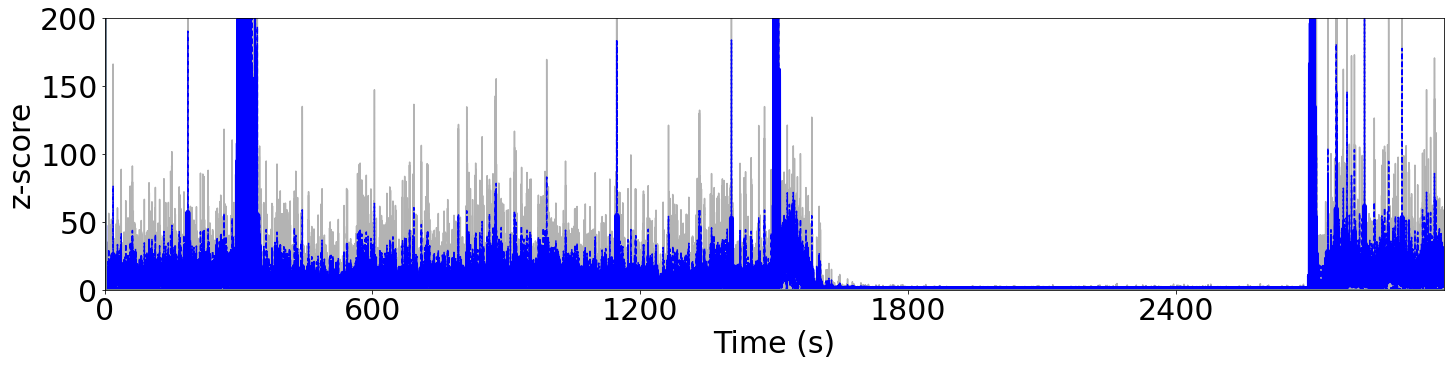

In [3]:
#Reorganizing behavioral data for analysis

behave_data= [0 for i in (range(tpath+1))]

#Behavior video analysis
for j in range(tpath):
    print("\033[1m"+"#",j+1,"\033[0m")
    print("\033[1m"+"   Collecting video infomration"+"\033[0m")
    #Video information
    cap = cv2.VideoCapture(VIDEO_PATH[j])
    fwidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    fheight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frate = cap.get(cv2.CAP_PROP_FPS)
    tframes = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    print("     Image: ", fwidth, " x ", fheight, " at ",frate, "frames/s x ", tframes, " frames")
    cap.release()
    cv2.destroyAllWindows()
    print("Done.")

    #Collect pose coordinates from Deeplabcut csv file
    print("\033[1m"+"   Importing pose coordinates..."+"\033[0m")
    #initialize lists
    behave_time=[]
    nose_xcoord=[]
    nose_ycoord=[]
    leftEar_xcoord=[]
    leftEar_ycoord=[]
    rightEar_xcoord=[]
    rightEar_ycoord=[]
    tailBase_xcoord=[]
    tailBase_ycoord=[]

    with open(BEHAVE_PATH+BEHAVE_NAME[j]) as behave_file:
        reader = csv.reader(behave_file)
        i=0       
        for row in reader:
            if i==1:
                print("     ",i,". ",row) #print coordinates headers
            if i>2:
                behave_time.append(np.round(int(row[0])/frate,2))
                nose_xcoord.append(np.round(float(row[1]),1))
                nose_ycoord.append(np.round(float(row[2]),1))
                leftEar_xcoord.append(np.round(float(row[4]),1))
                leftEar_ycoord.append(np.round(float(row[5]),1))
                rightEar_xcoord.append(np.round(float(row[7]),1))
                rightEar_ycoord.append(np.round(float(row[8]),1))
                tailBase_xcoord.append(np.round(float(row[10]),1))
                tailBase_ycoord.append(np.round(float(row[11]),1))
            #endif
            i=i+1
        #endfor
    behave_file.close()
    print("Done.")

    #Calculate frame by frame coordinate displacement 
    print("\033[1m"+"   Calculating pixel displacement..."+"\033[0m")
    #initialize variables
    nose_dist = [0]
    tailBase_dist = [0]
    for i in range(len(behave_time)):
        if i>0:
            nose_dist.append(np.round(math.sqrt((nose_xcoord[i]-nose_xcoord[i-1])**2 + (nose_ycoord[i]-nose_ycoord[i-1])**2),2))
            tailBase_dist.append(np.round(math.sqrt((tailBase_xcoord[i]-tailBase_xcoord[i-1])**2 + (tailBase_ycoord[i]-tailBase_ycoord[i-1])**2),2))
        #endif
    #end for i
    
    if j==0:
        behave_data[0]= behave_time
    #endif
    behave_data[j+1]=[nose_dist[x]+tailBase_dist[x] for x in range(len(behave_time))]
    print("Done.")
#endfor j

max_size = len(behave_data[0])
for j in range(tpath):
    if(len(behave_data[j+1])>max_size):
        max_size=len(behave_data[j+1])
    #endif
#endfor j

for j in range(tpath+1):
    temp = [np.NaN]*max_size
    for i in range(len(behave_data[j])):
        temp[i] = behave_data[j][i]
    #endfor i
    behave_data[j]= temp
#endfor j

all_behave_signals = np.vstack((behave_data[1],behave_data[2],behave_data[3], behave_data[4], behave_data[5], behave_data[6], behave_data[7], behave_data[8], behave_data[9]))

#end j for loop
mean_signal = np.nanmean(all_behave_signals,axis=0)
std_signal = np.nanstd(all_behave_signals,axis=0)


font_size = 30
plot_width = 24
plot_height = 5

fig,(ax5) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
for j in range(tpath+1):
    if j>0:
        ax5.plot(behave_data[0], behave_data[j], color=(.7,.7,.7))
#end j for loop
ax5.plot(behave_data[0],mean_signal, color='b', linewidth=5)
ax5.plot(behave_data[0], mean_signal + std_signal, 'b--', behave_data[0], mean_signal - std_signal, 'b--')
ax5.axvline(0, color='slategray', linewidth=3)
ax5.axhline(0, color='slategray', linewidth=3)
ax5.set_ylabel('z-score', fontsize=font_size)
ax5.set_xlabel('Time (s)', fontsize=font_size)
ax5.tick_params(axis="x", labelsize=font_size)
ax5.tick_params(axis="y", labelsize=font_size)
ax5.set_ylim(0,200)
ax5.set_xlim(0, 3000)
plt.xticks(np.arange(0, 3000, 600))
plt.show()

In [4]:
#Behavioral analysis

behave_mean_marker1_array = []
behave_mean_marker2_array = []
behave_mean2_marker1_array = []
behave_mean2_marker2_array = []

activity_mean_array = []
activity_mean2_array = []

for k in range(tpath):
    print("\033[1m"+"#",k+1,"\033[0m")
    print("\033[1m"+"   Collecting video infomration"+"\033[0m")
    #Video information
    cap = cv2.VideoCapture(VIDEO_PATH[k])
    fwidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    fheight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frate = cap.get(cv2.CAP_PROP_FPS)
    tframes = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    print("     Image: ", fwidth, " x ", fheight, " at ",frate, "frames/s x ", tframes, " frames")
    cap.release()
    cv2.destroyAllWindows()
    print("Done.")

    #Collect pose coordinates from Deeplabcut csv file
    print("\033[1m"+"   Importing pose coordinates..."+"\033[0m")
    #initialize lists
    behave_time=[]
    nose_xcoord=[]
    nose_ycoord=[]
    leftEar_xcoord=[]
    leftEar_ycoord=[]
    rightEar_xcoord=[]
    rightEar_ycoord=[]
    tailBase_xcoord=[]
    tailBase_ycoord=[]

    with open(BEHAVE_PATH+BEHAVE_NAME[k]) as behave_file:
        reader = csv.reader(behave_file)
        i=0       
        for row in reader:
            if i==1:
                print("     ",i,". ",row) #print coordinates headers
            if i>2:
                behave_time.append(np.round(int(row[0])/frate,2))
                nose_xcoord.append(np.round(float(row[1]),1))
                nose_ycoord.append(np.round(float(row[2]),1))
                leftEar_xcoord.append(np.round(float(row[4]),1))
                leftEar_ycoord.append(np.round(float(row[5]),1))
                rightEar_xcoord.append(np.round(float(row[7]),1))
                rightEar_ycoord.append(np.round(float(row[8]),1))
                tailBase_xcoord.append(np.round(float(row[10]),1))
                tailBase_ycoord.append(np.round(float(row[11]),1))
            #endif
            i=i+1
        #endfor
    behave_file.close()
    print("Done.")

    #Calculate frame by frame coordinate displacement 
    print("\033[1m"+"   Calculating pixel displacement..."+"\033[0m")
    #initialize variables
    nose_dist = [0]
    tailBase_dist = [0]
    for i in range(len(behave_time)):
        if i>0:
            nose_dist.append(np.round(math.sqrt((nose_xcoord[i]-nose_xcoord[i-1])**2 + (nose_ycoord[i]-nose_ycoord[i-1])**2),2))
            tailBase_dist.append(np.round(math.sqrt((tailBase_xcoord[i]-tailBase_xcoord[i-1])**2 + (tailBase_ycoord[i]-tailBase_ycoord[i-1])**2),2))
        #endif
    #end for i
    
    if k==0:
        behave_data[0]= behave_time
    #endif
    behave_data[k+1]=[nose_dist[x]+tailBase_dist[x] for x in range(len(behave_time))]
    print("Done.")
    
    #TRANSITION
    print("\033[1m"+"Behavioral event detection: arrest to movement"+"\033[0m")
    #User defined parameters
    intervals=['pre','drug','ISO','emerge','post']
    print("total behave time: ", behave_time[-1])
    total_time = behave_time[-1]
    interval_cutoff = [0,300,1500,2700,femerge[k]/10,int(behave_time[-1])]
    #emergence_start = femerge[k]/10
    marker_dist = [nose_dist, tailBase_dist]
    pre_window_size = 5 # in second
    post_window_size = 10 # in second
    pause_interval = 1 #in second
    pause_threshold = 10 #pixel

    #Initialize matrices and lists
    category_size=len(intervals)
    #behavior marker # defined by marker_dist, manual addition if need more
    behave_data_marker1 = [[] for i in range(category_size)]
    behave_data_marker2 = [[] for i in range(category_size)]
    behave_data2_marker1 = [[] for i in range(category_size)]
    behave_data2_marker2 = [[] for i in range(category_size)]
    activity_data = [[] for i in range(category_size)]
    activity_data2 = [[] for i in range(category_size)]
    event_count = [0 for i in range(category_size)]
    event_count2 = [0 for i in range(category_size)]
    behave_interval_time = []
    behave_interval_time2 = []
    activity_interval_time = []
    activity_interval_time2 = []
#    behave_mean=[np.NaN for i in range(category_size)]
    behave_std=[np.NaN for i in range(category_size)]
#    behave_mean2=[np.NaN for i in range(category_size)]
    behave_std2=[np.NaN for i in range(category_size)]
    print("behave_data: ", len(behave_data_marker1))
    dF_F = aligned_data[k+1]
    
    #re-align time
    print("\033[1m"+"Re-aligning event times..."+"\033[0m")
    #define time intervals in behavioral and photometry data
    behave_interval_time.append(behave_time[0:int((pre_window_size+post_window_size)*frate)]) #behave_time
    activity_interval=int((pre_window_size+post_window_size)*freq_470A) #calculate activity interval
    activity_interval_time.append(time_470A[0:activity_interval]) #activity_time
    behave_interval_time2.append(behave_time[0:int((pre_window_size+post_window_size)*frate)])
    activity_interval=int((pre_window_size+post_window_size)*freq_470A)
    activity_interval_time2.append(time_470A[0:activity_interval])

    behave_mean=[]
    behave_mean2=[]
    behave_interval_time[0] = [i - pre_window_size for i in behave_interval_time[0]] #re-align to 0
    activity_interval_time[0] = [i - pre_window_size for i in activity_interval_time[0]] #realign to 0
    behave_interval_time2[0] = [i - pre_window_size for i in behave_interval_time2[0]]
    activity_interval_time2[0] = [i - pre_window_size for i in activity_interval_time2[0]]
    print("Realignment done.")

    print("\033[1m"+"Finding behavioral events..."+"\033[0m")
    count = 0
    #movement_bin = []
    initiate=0
    for i in range(int(total_time*frate)+1):
        if(i>pre_window_size*frate and i<int((int(total_time)-post_window_size)*frate) and int(i+post_window_size*frate)<len(marker_dist[0])):
            for m in range(len(interval_cutoff)-1):
                if(i>=(interval_cutoff[m]*frate) and i<(interval_cutoff[m+1]*frate)):
                    break;
                #endfor i
            #endfor m            
            #if not moving
            if(marker_dist[0][i]<pause_threshold and marker_dist[1][i]<pause_threshold):
            #no prior moving
                if(initiate==0):
                    count = count+1
                    #movement_bin.append(0)
                #if prior moving
                else:
                    #if moving duration met, count as move to arrest
                    if(np.amax(marker_dist[0][i:int(i+frate*pause_interval)])<pause_threshold and np.amax(marker_dist[1][i:int(i+frate*pause_interval)])<pause_threshold):
                        #event2_times.append(behave_time[i])
                        behave_data2_marker1[m].append(marker_dist[0][int(i-pre_window_size*frate):int(i+post_window_size*frate)])
                        behave_data2_marker2[m].append(marker_dist[1][int(i-pre_window_size*frate):int(i+post_window_size*frate)])
                        activity_data2[m].append(np.round(dF_F[int((i/frate-pre_window_size)*freq_470A):(int((i/frate-pre_window_size)*freq_470A)+activity_interval)],2))
                        initiate=0
                        count=0
                        #movement_bin.append(0)
                    #if moving duration not met, continue as moving
                    else:
                        count=count+1
                        #movement_bin.append(10)
            #if moving            
            else:
                #if prior not moving
                if(initiate==0):
                    #if not moving duration met, count as arrest to move
                    if(count>=(frate*pause_interval)):
                        #event_times.append(behave_time[i])
                        behave_data_marker1[m].append(marker_dist[0][int(i-pre_window_size*frate):int(i+post_window_size*frate)])
                        behave_data_marker2[m].append(marker_dist[1][int(i-pre_window_size*frate):int(i+post_window_size*frate)])
                        activity_data[m].append(np.round(dF_F[int((i/frate-pre_window_size)*freq_470A):(int((i/frate-pre_window_size)*freq_470A)+activity_interval)],2))
                        initiate=1
                        count=0
                        #movement_bin.append(10)
                    #if moving duration not met, back to 0
                    else:
                        count=0
                        #movement_bin.append(0)
                #if prior moving, continue to count as moving
                #else:
                    #movement_bin.append(10)
            #endif
        #else:
            #movement_bin.append(0)
    #endfor i
    print("Done.")

    #Normalize activity to baseline median
    print("\033[1m"+"Normalize to pre-event baseline..."+"\033[0m")
    for j in range(len(activity_data)):
        if(len(activity_data[j])!=0):
            event_count[j]=len(activity_data[j])
            for i in range(len(activity_data[j])):
                baseline_median = np.median(activity_data[j][i][0:int(pre_window_size*freq_470A)-1])
                activity_data[j][i] = [i-baseline_median for i in activity_data[j][i]]
            #end for i
        #endif
    #end for j
    print("A2M Event counts: ", event_count)

    for j in range(len(activity_data2)):
        if(len(activity_data2[j])!=0):
            event_count2[j]=len(activity_data2[j])
            for i in range(len(activity_data2[j])):
                baseline_median = np.median(activity_data2[j][i][0:int(pre_window_size*freq_470A)-1])
                activity_data2[j][i] = [i-baseline_median for i in activity_data2[j][i]]
            #end for i
        #endif
    #end for j
    print("M2A Event counts: ", event_count2)
    print("Done.")
    
    #Transpose data
    print("\033[1m"+"Re-format data..."+"\033[0m")
    behave_mean_marker1=[[] for i in range(category_size)]
    behave_mean_marker2=[[] for i in range(category_size)]
    behave_std_marker1=[[] for i in range(category_size)]
    behave_std_marker2=[[] for i in range(category_size)]
    for j in range(len(activity_data)):
        behave_data_transposed_marker1 = np.transpose(behave_data_marker1[j])
        behave_data_transposed_marker2 = np.transpose(behave_data_marker2[j])
        for i in range(len(behave_data_transposed_marker1)):    
            behave_mean_marker1[j].append(np.nanmean(behave_data_transposed_marker1[i]))
            behave_mean_marker2[j].append(np.nanmean(behave_data_transposed_marker2[i]))
            behave_std_marker1[j].append(np.nanstd(behave_data_transposed_marker1[i]))
            behave_std_marker2[j].append(np.nanstd(behave_data_transposed_marker2[i]))            
        #end for i
    #end for j
    
    behave_mean_marker1_array.append(behave_mean_marker1)
    behave_mean_marker2_array.append(behave_mean_marker2)
      
    print("A2M Behave mean 1: ", len(behave_mean_marker1))
    print("A2M Behave mean 2: ", len(behave_mean_marker2))

    behave_mean2_marker1=[[] for i in range(category_size)]
    behave_mean2_marker2=[[] for i in range(category_size)]
    behave_std2_marker1=[[] for i in range(category_size)]
    behave_std2_marker2=[[] for i in range(category_size)]
    for j in range(len(activity_data)):
        #print(j+1, "/", len(activity_data))
        behave_data2_transposed_marker1 = np.transpose(behave_data2_marker1[j])
        behave_data2_transposed_marker2 = np.transpose(behave_data2_marker2[j])
        for i in range(len(behave_data2_transposed_marker1)):    
            #print(i+1, "/", len(behave_data_transposed_marker1))
            behave_mean2_marker1[j].append(np.nanmean(behave_data2_transposed_marker1[i]))
            behave_mean2_marker2[j].append(np.nanmean(behave_data2_transposed_marker2[i]))
            behave_std2_marker1[j].append(np.nanstd(behave_data2_transposed_marker1[i]))
            behave_std2_marker2[j].append(np.nanstd(behave_data2_transposed_marker2[i]))
            #print("behave marker1 size: ", len(behave_mean_marker1))
        #end for i
    #end for j
                
    behave_mean2_marker1_array.append(behave_mean2_marker1)
    behave_mean2_marker2_array.append(behave_mean2_marker2)
    
    print("M2A Behave mean 1: ", len(behave_mean2_marker1))
    print("M2A Behave mean 2: ", len(behave_mean2_marker2))    
    
    activity_mean=[[] for i in range(category_size)]
    activity_std=[[] for i in range(category_size)]
    for j in range(len(activity_data)):
        activity_data_transposed = np.transpose(activity_data[j])
        for i in range(len(activity_data_transposed)):    
            activity_mean[j].append(np.nanmean(activity_data_transposed[i]))
            activity_std[j].append(np.nanstd(activity_data_transposed[i]))
            
        #end for i
    #end for j
    activity_mean_array.append(activity_mean)
    print("A2M Activity mean: ", len(activity_mean))

    activity_mean2=[[] for i in range(category_size)]
    activity_std2=[[] for i in range(category_size)]
    for j in range(len(activity_data2)):
        activity_data2_transposed = np.transpose(activity_data2[j])
        for i in range(len(activity_data2_transposed)):    
            activity_mean2[j].append(np.nanmean(activity_data2_transposed[i]))
            activity_std2[j].append(np.nanstd(activity_data2_transposed[i]))            
        #end for i
    #end for j
    
    activity_mean2_array.append(activity_mean2)

    print("M2A Activity mean: ", len(activity_mean2))
    print("Done.")
#endfor k
print("ALL done")


# 1 
   1. Collecting video infomration
     Image:  640  x  480  at  10.0 frames/s x  30613.0  frames
Done.
   2. Importing pose coordinates...
      1 .  ['bodyparts', 'Nose', 'Nose', 'Nose', 'LeftEar', 'LeftEar', 'LeftEar', 'RightEar', 'RightEar', 'RightEar', 'TailBase', 'TailBase', 'TailBase']
Done.
   3. Calculating pixel displacement...
Done.
10. Behavioral event detection: arrest to movement
total behave time:  3061.2
behave_data:  5
11. Re-aligning event times...
Realignment done.
12. Finding behavioral events...
Done.
13. Normalize pre-event window to 0...
A2M Event counts:  [70, 201, 12, 2, 32]
M2A Event counts:  [70, 201, 12, 1, 33]
Done.
14. Re-format data...
A2M Behave mean 1:  5
A2M Behave mean 2:  5
M2A Behave mean 1:  5
M2A Behave mean 2:  5
A2M Activity mean:  5
M2A Activity mean:  5
Done.
# 2 
   1. Collecting video infomration
     Image:  640  x  480  at  10.0 frames/s x  27520.0  frames
Done.
   2. Importing pose coordinates...
      1 .  ['bodyparts', 'Nose', 'Nos

# Template generation

21. Plot behavior (arrest to movement)...


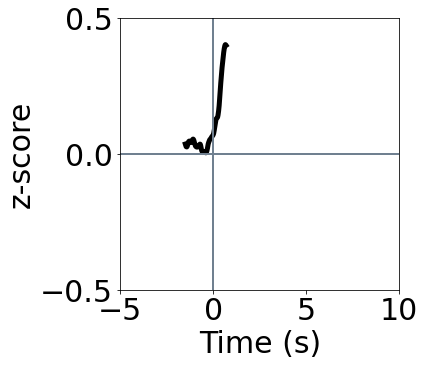

22. Plot behavior (movement to arrest)...


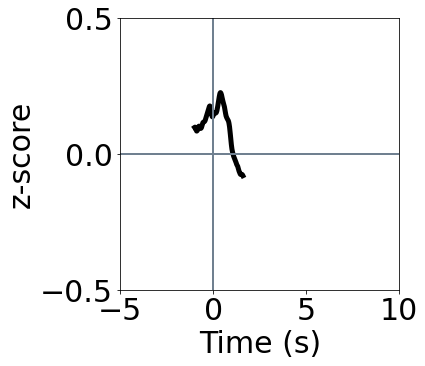

Done 2


In [5]:
import numpy as np  # package for scientific computing, handles arrays and math
from operator import add
#Plot behavior, activity events

#User defined parameters
font_size = 30
plot_width = 5
plot_height = 5
xint = 5
ymax_4 = 40
ymin_5 = -0.5
ymax_5 = 0.5
#save=True
save=False
j=1

temp_array = []
temp_transpose_array = []

behave_mean_all_marker_array = []
activity_mean_all_array = []
behave_std_all_marker_array = []
activity_std_all_array = []

behave_mean2_all_marker_array = []
activity_mean2_all_array = []
behave_std2_all_marker_array = []
activity_std2_all_array = []

#Arrest to Movement
#for i in range(len(behave_mean_marker1_array))

print("\033[1m"+"21. Plot behavior (arrest to movement)..."+"\033[0m")

analysis_window = [1.5,0.7] #Template window size
temp_array=[[] for i in range(tpath)]
temp_transposed_array=[]
fig,ax6 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
for i in range(len(activity_mean_array)):
    temp_array[i]=activity_mean_array[i][j][int((pre_window_size-analysis_window[0])*freq_470A):int((pre_window_size+analysis_window[1])*freq_470A)]
temp_transposed_array=np.transpose(temp_array)
for i in range(len(temp_transposed_array)):
    activity_mean_all_array.append(np.nanmean(temp_transposed_array[i]))
    activity_std_all_array.append(np.nanstd(temp_transposed_array[i]))    
reduced_time=np.array(activity_interval_time[0][int((pre_window_size-analysis_window[0])*freq_470A):int((pre_window_size+analysis_window[1])*freq_470A)])
reduced_time = reduced_time[::10]
reduced_activity = np.array(activity_mean_all_array)[::10]
reduced_activity_std = np.array(activity_std_all_array)[::10]
ax6.plot(reduced_time,reduced_activity, color='black', linewidth=5)
#ax6.fill_between(reduced_time, list(map(operator.add,reduced_activity,reduced_activity_std)), list(map(operator.sub,reduced_activity,reduced_activity_std)), facecolor='gray', alpha=0.2)
ax6.set_ylabel('z-score', fontsize=font_size)
ax6.set_xlabel('Time (s)', fontsize=font_size)
ax6.axvline(0, color='slategray', linewidth=2)
ax6.axhline(0, color='slategray', linewidth=2)
ax6.tick_params(axis="x", labelsize=font_size)
ax6.tick_params(axis="y", labelsize=font_size)
ax6.set_ylim(ymin_5,ymax_5)
ax6.set_xlim(-1*pre_window_size,post_window_size)
plt.yticks(np.arange(ymin_5, ymax_5+0.01, 0.5))
plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
plt.savefig("20230302_init_template.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

if(save):
    np.save("20220118_init_template_1_5_1_0.npy",activity_mean_all_array)
#endif

#Movement to Arrest
print("\033[1m"+"22. Plot behavior (movement to arrest)..."+"\033[0m")
analysis_window = [1,1.6] #Template window size
temp_array=[[] for i in range(tpath)]
temp_transposed_array=[]
fig,ax9 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
for i in range(len(activity_mean2_array)):
    temp_array[i]=activity_mean2_array[i][j][int((pre_window_size-analysis_window[0])*freq_470A):int((pre_window_size+analysis_window[1])*freq_470A)]
temp_transposed_array=np.transpose(temp_array)
for i in range(len(temp_transposed_array)):
    activity_mean2_all_array.append(np.nanmean(temp_transposed_array[i]))
    activity_std2_all_array.append(np.nanstd(temp_transposed_array[i]))    
reduced_time=np.array(activity_interval_time[0])[int((pre_window_size-analysis_window[0])*freq_470A):int((pre_window_size+analysis_window[1])*freq_470A)]
reduced_time=reduced_time[::10]
reduced_activity = np.array(activity_mean2_all_array)[::10]
reduced_activity_std = np.array(activity_std2_all_array)[::10]
ax9.plot(reduced_time,reduced_activity, color='black', linewidth=5)
#ax9.fill_between(reduced_time, list(map(operator.add,reduced_activity,reduced_activity_std)), list(map(operator.sub,reduced_activity,reduced_activity_std)), facecolor='gray', alpha=0.2)
ax9.set_ylabel('z-score', fontsize=font_size)
ax9.set_xlabel('Time (s)', fontsize=font_size)
ax9.axvline(0, color='slategray', linewidth=2)
ax9.axhline(0, color='slategray', linewidth=2)
ax9.tick_params(axis="x", labelsize=font_size)
ax9.tick_params(axis="y", labelsize=font_size)
ax9.set_ylim(ymin_5,ymax_5)
ax9.set_xlim(-1*pre_window_size,post_window_size)
plt.yticks(np.arange(ymin_5, ymax_5+0.01, 0.5))
plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
#plt.savefig("20230302_arrest_template.pdf",bbox_inches = 'tight',dpi=300)
plt.show()
print("Done 2")

if(save):
    np.save("20220118_arrest_template_1_0_1_6.npy",activity_mean2_all_array)
#endif

# Template matching

In [15]:
# Analyzing a new photometry trace using template matching

#import libraries and files
import pandas as pd
import operator
import cv2
import csv
import math
import matplotlib.pyplot as plt  # standard Python plotting library
import numpy as np  # package for scientific computing, handles arrays and math
import matplotlib.gridspec as gs
from scipy.optimize import curve_fit
import seaborn as sns
from tdt import read_block

baseline_start = 0 # in seconds
baseline_end = 600 #in seconds
dF_F_outlier = 50

#photometry path and file
FOLDER_PATH = 'E:/Bruchas_lab/Lab_photometry/Li_fear_box_triggered-220602-095047/'

FOLDER_NAME = '159459-L-221020-102241'
BLOCK_PATH = FOLDER_PATH + FOLDER_NAME
VIDEO_PATH = BLOCK_PATH+'/'+'Li_photo_stim_1_camera_-220601-092827_159459-L-221020-102241_Cam1.avi'

#Behavior Deeplabcut file
BEHAVE_PATH = 'E:/Bruchas_lab/Lab_DLC/'
BEHAVE_NAME = 'Li_photo_stim_1_camera_-220601-092827_159459-L-221020-102241_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv'

print(i+1,".", FOLDER_NAME)
print("\033[1m"+"1. Importing photometry data..."+"\033[0m")
data = read_block(BLOCK_PATH)

#Define sample size and frequency
data_470 = data.streams._470A.data
data_405 = data.streams._405A.data
size_470 = len(data_470)
size_405 = len(data_405) #isosbestic channel
freq_470 = data.streams._470A.fs #sampling frequency
print("470/405 sampling frequency: ", freq_470)
time_470 = np.linspace(1, size_470, size_470) / freq_470
total_time = time_470[size_470-1]
print("Total sampling time: ", total_time)
fit_window = size_470
print("Done.")

print("\033[1m"+"2. Normalizing photometry data..."+"\033[0m")
#Fit 405 nm trace to 470 nm by applying least-squares fit
#Linear least square fit
Sum_f = 0 #f is 405A
Sum_g = 0 #g is 470A
Sum_fg = 0 # fg is 405A*407A
Sum_fsq = 0 #fsq is f^2 or 405A^2
for i in range(fit_window):
    Sum_f = Sum_f + data_405[i]
    Sum_g = Sum_g + data_470[i]
    Sum_fg = Sum_fg + data_405[i]*data_470[i]
    Sum_fsq = Sum_fsq + (data_405[i])*(data_405[i])
#end for i

#Slope*x + Intercept = y
Slope = (Sum_f*Sum_g - size_470*Sum_fg)/(Sum_f*Sum_f - size_470*Sum_fsq)
Intercept = (Sum_g*Sum_fsq - Sum_f*Sum_fg)/(size_470*Sum_fsq - Sum_f*Sum_f)
print("Least squares fit: y = ", Slope, "*x + ", Intercept)

#initialize fit
Fit_405 = [0 for i in range(size_470)]
dF_F = [0 for i in range(size_470)]
for i in range(size_470):
    Fit_405[i] = Slope*data_405[i] + Intercept
    dF_F[i] = (data_470[i] - Fit_405[i])*100/Fit_405[i]
#end for i
print("Done.")

#Curate
print("\033[1m"+"3. Removing outlier..."+"\033[0m")
count = 0
for i in range(size_470):
    if abs(dF_F[i])>dF_F_outlier:
        dF_F[i] = np.NaN
        count = count + 1
    #endif
#end for i
print("Number of outliers changed to NaN: ", count)
print("Done.")

#Delete beginning poor signal
for i in range(int(freq_470*0.5)):
    dF_F[i]=np.NaN
#endfor i

#Subtract median
print("\033[1m"+"4. Subtracting average..."+"\033[0m")
avg_F = np.nanmean(dF_F[int(baseline_start*freq_470):int(baseline_end*freq_470)])
std_F = np.nanstd(dF_F[int(baseline_start*freq_470):int(baseline_end*freq_470)])
for i in range(size_470):
     dF_F[i] = (dF_F[i] - avg_F)/std_F
#end for i
print("Done.")   


4170 . 159459-L-221020-102241
1. Importing photometry data...
read from t=0s to t=3182.84s
470/405 sampling frequency:  1017.2526245117188
Total sampling time:  3182.8475267430495
Done.
2. Normalizing photometry data...
Least squares fit: y =  1.2006666730904927 *x +  -37.02892903540114
Done.
3. Removing outlier...
Number of outliers changed to NaN:  224
Done.
4. Subtracting average...
Done.


In [24]:
#Load prior saved data from analysis above
event_times=np.load("Archived_figs/20220118_event_init.npy")
event2_times=np.load("Archived_figs/20220118_event_arrest.npy")
behave_time = np.load("Archived_figs/20220118_behave_time.npy")
marker_dist=np.load("Archived_figs/20220118_dist_markers.npy")
movement_bin = np.load("Archived_figs/20220118_movement_bin.npy")
all_movement_bin = np.load("Archived_figs/20220118_all_movement_bin.npy")


template:  3255
dF:  305175
sig 1:  326
sig 2:  30518
Corr len: 30192
peaks:  103
delay:  -236.7905835041883


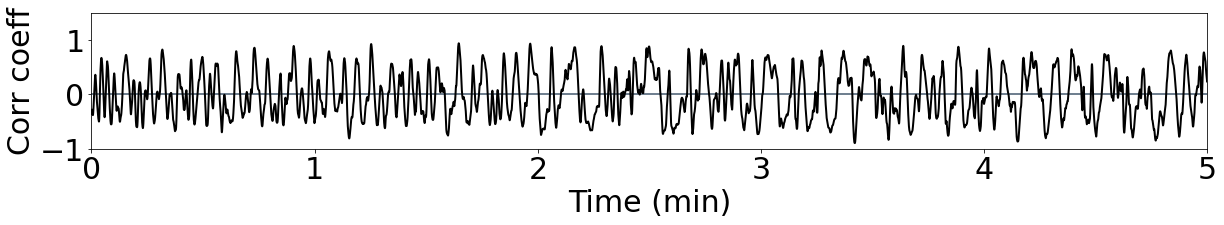

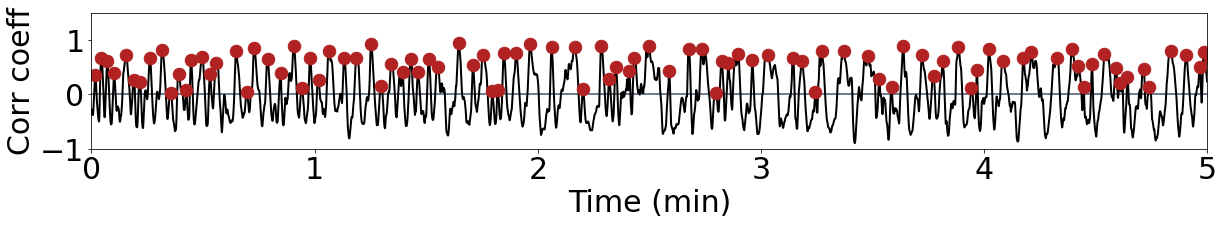

In [184]:
#Using Pearson's r (scale invariant) to detect matches to template

import numpy as np
import scipy.stats  

analysis_window = [2.5,0.7]
hi_cutoff = 300
template = np.load("Archived_figs/20220118_init_template_2_5_0_7.npy") #Arrest to movement template
dF_data = dF_F[0:int(hi_cutoff*freq_470)]
corr_coeff = []
print("template: ", len(template))
print("dF: ", len(dF_data))

sig1 = np.nan_to_num(template[::10])
temp_size = len(sig1)
sig2 = np.nan_to_num(dF_data[::10])
print("sig 1: ", len(sig1))
print("sig 2: ", len(sig2))

scales = [1]
corr_coeff_scaled = []
for j in range(len(scales)):
    sig1_scaled = [x*scales[j] for x in sig1]
    corr_coeff = []
    for i in range(len(sig2)-temp_size):
        temp = scipy.stats.pearsonr(sig1_scaled, sig2[i:i+temp_size])
        corr_coeff.append(temp[0])
    #endfor i
    corr_coeff_scaled.append(corr_coeff)
#endfor j

corr_coeff_scaled = np.transpose(np.asarray(corr_coeff_scaled))
print("Corr len:", len(corr_coeff_scaled))

#convert to array
corr_coeff = []
for j in range(len(corr_coeff_scaled)):
    corr_coeff.append(np.nanmax(corr_coeff_scaled[j]))
#endfor j
corr_coeff=np.asarray(corr_coeff)

#Find peaks
from scipy.signal import find_peaks
peaks, _ = find_peaks(corr_coeff, distance=100, prominence=0.25)
event3_times = []
print("peaks: ", len(peaks))

temp = time_470[0:int(hi_cutoff*freq_470)]
temp = temp[::10]
temp = temp[:-temp_size]
print("delay: ", 60-temp[-1])
time_data = [x+analysis_window[0] for x in temp]

for i in range(len(peaks)):
    event3_times.append(time_data[peaks[i]])
#endfor i

#Cutoff for peak detection
pruned_peaks=[]
corr_cutoff=0
for j in range(len(peaks)):
    if(corr_coeff[peaks[j]]>corr_cutoff):
        pruned_peaks.append(peaks[j])
    #endif
#endfor j

xmin=0
xmax=5
xint=1
ymin_2=-1
ymax_2=1.5
yint_2=1
plot_width_2 = 20
plot_height_2 = 2.5

pruned_peaks_min = [x/6000 for x in pruned_peaks]
time_min = []
for i in range(len(corr_coeff)):
    time_min.append(i/6000)
#endfor i

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
ax2.axhline(corr_cutoff, color='slategray', linewidth=2)
ax2.plot(time_min,corr_coeff, color='black', linewidth=2)
ax2.set_ylabel('Corr coeff', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
plt.show()

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
ax2.axhline(corr_cutoff, color='slategray', linewidth=2)
ax2.plot(time_min,corr_coeff, color='black', linewidth=2)
ax2.plot(pruned_peaks_min, corr_coeff[pruned_peaks], ".", markersize=25, color='firebrick')
ax2.set_ylabel('Corr coeff', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
plt.show()

event3_times=[]
for i in range(len(pruned_peaks)):
    event3_times.append(time_data[pruned_peaks[i]])
#endfor i

In [169]:
behave_mean3_marker1_array = []
activity_mean3_array = []
behave_data3_marker1 = []
activity_data3=[]

for j in range(len(event3_times)):
    if(event3_times[j]-pre_window_size>0 and event3_times[j]+post_window_size<behave_time[-1]):
        activity_data3.append(np.around(dF_F[int((event3_times[j]-pre_window_size)*freq_470):int((event3_times[j]+post_window_size)*freq_470-1)],2))
        behave_data3_marker1.append(marker_dist[0][int((event3_times[j]-pre_window_size)*frate):int((event3_times[j]+post_window_size)*frate)])
    #endif
#endfor j
print("\033[1m"+"Re-format data..."+"\033[0m")
behave_mean3_marker1=[]
behave_std3_marker1=[]
behave_data3_transposed_marker1 = np.transpose(np.array(behave_data3_marker1))
for i in range(len(behave_data3_transposed_marker1)):    
    behave_mean3_marker1.append(np.nanmean(behave_data3_transposed_marker1[i]))
    behave_std3_marker1.append(np.nanstd(behave_data3_transposed_marker1[i]))
#end for i
                
behave_mean3_marker1_array = behave_mean3_marker1
behave_std3_marker1_array = behave_std3_marker1
  
print("Behave mean 3: ", len(behave_mean3_marker1))
        
activity_mean3=[]
activity_std3=[]
activity_data3_transposed=np.transpose(np.array(activity_data3))
for i in range(len(activity_data3_transposed)):    
    activity_mean3.append(np.nanmean(activity_data3_transposed[i]))
    activity_std3.append(np.nanstd(activity_data3_transposed[i]))            
#end for i
    
activity_mean3_array = activity_mean3
activity_std3_array = activity_std3

print("Activity mean 3: ", len(activity_mean3))
 

Re-format data...
Behave mean 3:  150
Activity mean 3:  15258


21. Plot behavior (arrest to movement)...


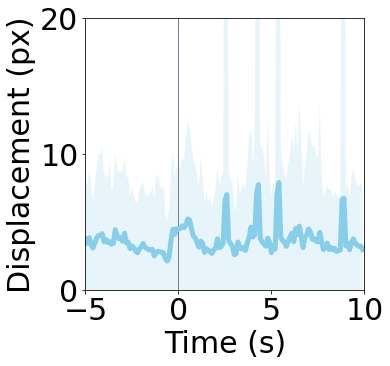

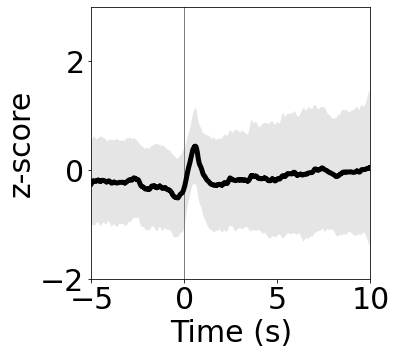

In [170]:
#Movement pixel displacement associated with template-matched photometry events

import numpy as np  # package for scientific computing, handles arrays and math
from operator import add
#Plot behavior, activity events

#User defined parameters
font_size = 30
plot_width = 5
plot_height = 5
xint = 5
ymax_4 = 20
ymin_5 = -2
ymax_5 = 3
j=0

#Arrest to Movement
#for i in range(len(behave_mean_marker1_array))

print("\033[1m"+"21. Plot behavior (arrest to movement)..."+"\033[0m")
#for j in range(len(behave_data)):
temp_array=[]
temp_transposed_array=[]
fig,ax4 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
behave_mean_array=behave_mean3_marker1_array #add two markers together
behave_std_array = behave_std3_marker1_array
ax4.axvline(0, color='slategray', linewidth=1)
ax4.plot(behave_interval_time[0],behave_mean_array, color='skyblue', linewidth=5)
ax4.fill_between(behave_interval_time[0], list(map(operator.add,behave_mean_array,behave_std_array)), list(map(operator.sub,behave_mean_array,behave_std_array)), facecolor='skyblue', alpha=0.2)
ax4.set_ylabel('Displacement (px)', fontsize=font_size)
ax4.set_xlabel('Time (s)', fontsize=font_size)
ax4.tick_params(axis="x", labelsize=font_size)
ax4.tick_params(axis="y", labelsize=font_size)
ax4.set_ylim(0,ymax_4)
ax4.set_xlim(-1*pre_window_size,post_window_size)
plt.yticks(np.arange(0, ymax_4+0.01, 10))
plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
#plt.savefig("20230302_LC_behavior_init_"+str(pause_interval)+"s_"+str(pause_threshold)+"px_HEAD_predicted.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

fig,ax6 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
ax6.axvline(0, color='slategray', linewidth=1)
ax6.plot(activity_interval_time[0],activity_mean3_array, color='black', linewidth=5)
ax6.fill_between(activity_interval_time[0], list(map(operator.add,activity_mean3_array,activity_std3_array)), list(map(operator.sub,activity_mean3_array,activity_std3_array)), facecolor='gray', alpha=0.2)
ax6.set_ylabel('z-score', fontsize=font_size)
ax6.set_xlabel('Time (s)', fontsize=font_size)
#ax6.axvline(0, color='slategray', linewidth=3)
#ax6.axhline(0, color='slategray', linewidth=3)
ax6.tick_params(axis="x", labelsize=font_size)
ax6.tick_params(axis="y", labelsize=font_size)
ax6.set_ylim(ymin_5,ymax_5)
ax6.set_xlim(-1*pre_window_size,post_window_size)
plt.yticks(np.arange(ymin_5, ymax_5+0.01, 2))
plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
#plt.savefig("20230302_LC_activity_init_"+str(pause_interval)+"s_"+str(pause_threshold)+"px_predicted.pdf",bbox_inches = 'tight',dpi=300)
plt.show()


delay:  -236.7905835041883


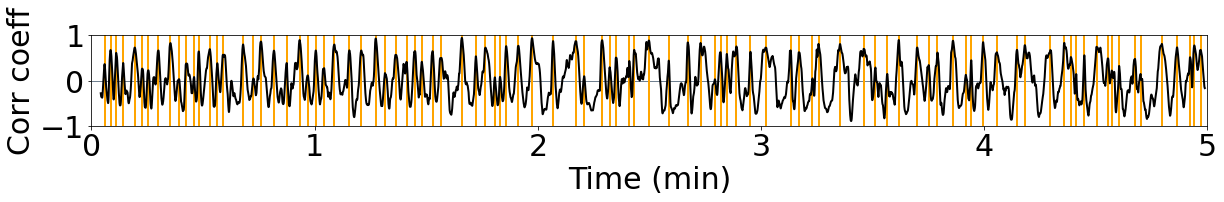

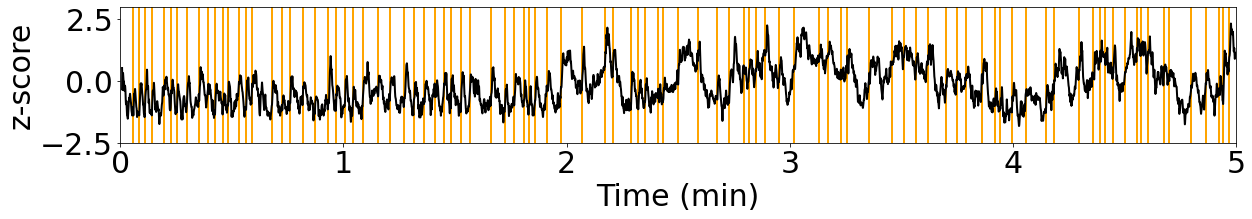

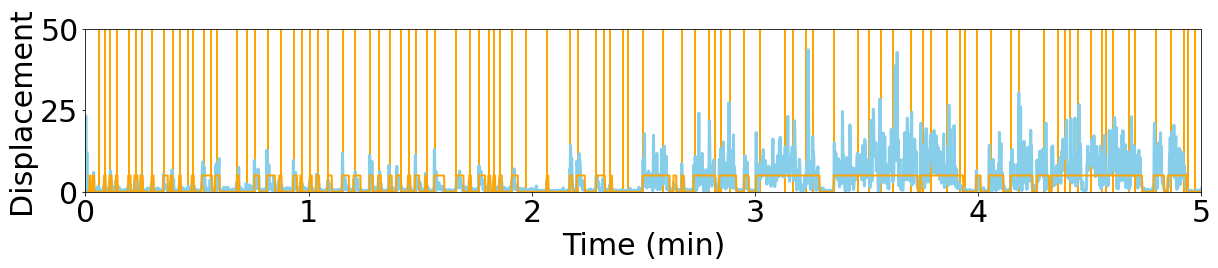

In [171]:
#All template-detected events along the photometry trace

#User defined plot parameters
plot_width_2 = 20
plot_height_2 = 2.5
xmin=0
xmax=5
xint=1
ymin_2=-1
ymax_2=1
yint_2=1

temp = time_470[0:int(hi_cutoff*freq_470)]
temp = temp[::10]
temp = temp[:-temp_size]
print("delay: ", 60-temp[-1])
time_data = [x+analysis_window[0] for x in temp]
time_data_min = [x/60 for x in time_data]
scaled_movement_bin = [1*x/10-1 for x in all_movement_bin]
event3_times_min = [x/60 for x in event3_times]

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2*2/3))
ax2.axhline(0, color='slategray', linewidth=1)
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange',linewidth=2)
#endfor i
#ax2.plot(time_data_min, corr_coeff[pruned_peaks], ".", markersize=10, color='firebrick')
ax2.plot(time_data_min, corr_coeff, color='black', linewidth=2)
#ax2.plot(behave_time_min, scaled_movement_bin, color='orange',linewidth=4)
ax2.set_ylabel('Corr coeff', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_graph_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

#User defined plot parameters
plot_width_2 = 20
plot_height_2 = 2.5
ymin_2=-2.5
ymax_2=3
yint_2=2.5

scaled_movement_bin = [5*x/10-5 for x in all_movement_bin]
time_470_min = [x/60 for x in time_470]
behave_time_min = [x/60 for x in behave_time]
event3_times_min = [x/60 for x in event3_times]

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange',linewidth=2)
#endfor i
ax2.plot(time_470_min[::10], dF_F[::10], color='black', linewidth=2)
#ax2.plot(behave_time_min, scaled_movement_bin, color='orange',linewidth=4)
ax2.set_ylabel('z-score', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_photometry_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

#User defined plot parameters
plot_width_2 = 20
plot_height_2 = 3
ymin_2=0
ymax_2=50
yint_2=25

scaled_movement_bin = [x for x in all_movement_bin]

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange',linewidth=2)
#endfor i
ax2.plot(behave_time_min, marker_dist[0], color='skyblue',linewidth=3)
ax2.plot(behave_time_min, scaled_movement_bin, color='orange',linewidth=2)
ax2.set_ylabel('Displacement', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_behavior_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()


template:  3560
dF:  305175
sig 1:  356
sig 2:  30518
Corr len: 30162
peaks:  93
delay:  -236.4956715100866


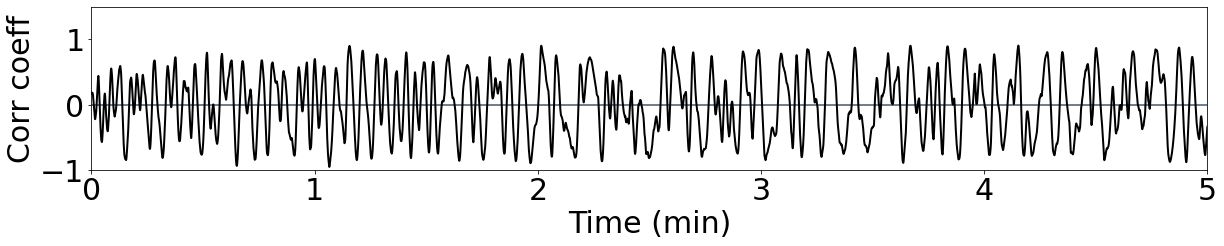

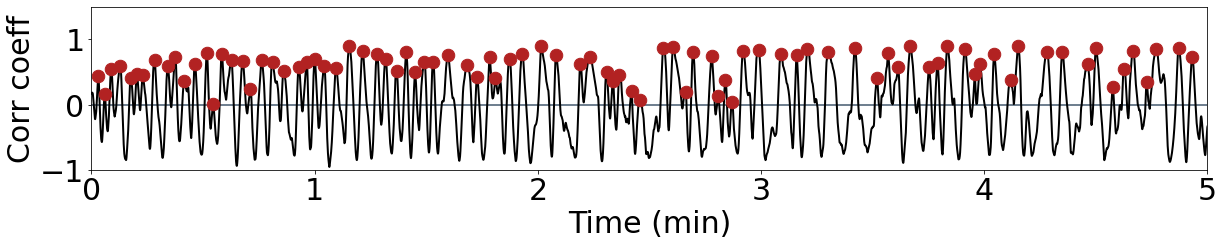

In [152]:
#Using Pearson's r (scale invariant) to detect matches to template

import numpy as np
import scipy.stats  

analysis_window = [1.5,2.0]
hi_cutoff = 300
template = np.load("Archived_figs/20220118_arrest_template_1_5_2_0.npy") #Movement to arrest template
dF_data = dF_F[0:int(hi_cutoff*freq_470)]
corr_coeff = []
print("template: ", len(template))
print("dF: ", len(dF_data))

sig1 = np.nan_to_num(template[::10])
temp_size = len(sig1)
sig2 = np.nan_to_num(dF_data[::10])
print("sig 1: ", len(sig1))
print("sig 2: ", len(sig2))

scales = [1]
corr_coeff_scaled = []
for j in range(len(scales)):
    sig1_scaled = [x*scales[j] for x in sig1]
    corr_coeff = []
    for i in range(len(sig2)-temp_size):
        temp = scipy.stats.pearsonr(sig1_scaled, sig2[i:i+temp_size])
        corr_coeff.append(temp[0])
    #endfor i
    corr_coeff_scaled.append(corr_coeff)
#endfor j

corr_coeff_scaled = np.transpose(np.asarray(corr_coeff_scaled))
print("Corr len:", len(corr_coeff_scaled))

#convert to array
corr_coeff = []
for j in range(len(corr_coeff_scaled)):
    corr_coeff.append(np.nanmax(corr_coeff_scaled[j]))
#endfor j
corr_coeff=np.asarray(corr_coeff)

#Find peaks
from scipy.signal import find_peaks
peaks, _ = find_peaks(corr_coeff, distance=100, prominence=0.25)
event3_times = []
print("peaks: ", len(peaks))

temp = time_470[0:int(hi_cutoff*freq_470)]
temp = temp[::10]
temp = temp[:-temp_size]
print("delay: ", 60-temp[-1])
time_data = [x+analysis_window[0] for x in temp]

for i in range(len(peaks)):
    event3_times.append(time_data[peaks[i]])
#endfor i

#Cutoff for peak detection
pruned_peaks=[]
corr_cutoff=0
for j in range(len(peaks)):
    if(corr_coeff[peaks[j]]>corr_cutoff):
        pruned_peaks.append(peaks[j])
    #endif
#endfor j

xmin=0
xmax=5
xint=1
ymin_2=-1
ymax_2=1.5
yint_2=1

pruned_peaks_min = [x/6000 for x in pruned_peaks]
time_min = []
for i in range(len(corr_coeff)):
    time_min.append(i/6000)
#endfor i

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
ax2.axhline(corr_cutoff, color='slategray', linewidth=2)
ax2.plot(time_min,corr_coeff, color='black', linewidth=2)
ax2.set_ylabel('Corr coeff', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
plt.show()

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
ax2.axhline(corr_cutoff, color='slategray', linewidth=2)
ax2.plot(time_min,corr_coeff, color='black', linewidth=2)
ax2.plot(pruned_peaks_min, corr_coeff[pruned_peaks], ".", markersize=25, color='firebrick')
ax2.set_ylabel('Corr coeff', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_photometry_template_crosscorrelate.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

event3_times=[]
for i in range(len(pruned_peaks)):
    event3_times.append(time_data[pruned_peaks[i]])
#endfor i

In [153]:
behave_mean3_marker1_array = []
activity_mean3_array = []
behave_data3_marker1 = []
activity_data3=[]

for j in range(len(event3_times)):
    if(event3_times[j]-pre_window_size>0 and event3_times[j]+post_window_size<behave_time[-1]):
        activity_data3.append(np.around(dF_F[int((event3_times[j]-pre_window_size)*freq_470):int((event3_times[j]+post_window_size)*freq_470-1)],2))
        behave_data3_marker1.append(marker_dist[0][int((event3_times[j]-pre_window_size)*frate):int((event3_times[j]+post_window_size)*frate)])
    #endif
#endfor j
print("\033[1m"+"20. Re-format data..."+"\033[0m")
behave_mean3_marker1=[]
behave_std3_marker1=[]
behave_data3_transposed_marker1 = np.transpose(np.array(behave_data3_marker1))
for i in range(len(behave_data3_transposed_marker1)):    
    behave_mean3_marker1.append(np.nanmean(behave_data3_transposed_marker1[i]))
    behave_std3_marker1.append(np.nanstd(behave_data3_transposed_marker1[i]))
#end for i
                
behave_mean3_marker1_array = behave_mean3_marker1
behave_std3_marker1_array = behave_std3_marker1
  
print("Behave mean 3: ", len(behave_mean3_marker1))
        
activity_mean3=[]
activity_std3=[]
activity_data3_transposed=np.transpose(np.array(activity_data3))
for i in range(len(activity_data3_transposed)):    
    activity_mean3.append(np.nanmean(activity_data3_transposed[i]))
    activity_std3.append(np.nanstd(activity_data3_transposed[i]))            
#end for i
    
activity_mean3_array = activity_mean3
activity_std3_array = activity_std3

print("Activity mean 3: ", len(activity_mean3))
 

20. Re-format data...
Behave mean 3:  150
Activity mean 3:  15258


21. Plot behavior (arrest to movement)...


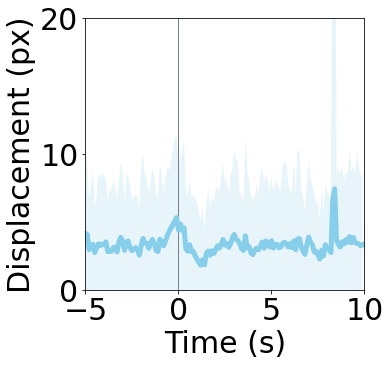

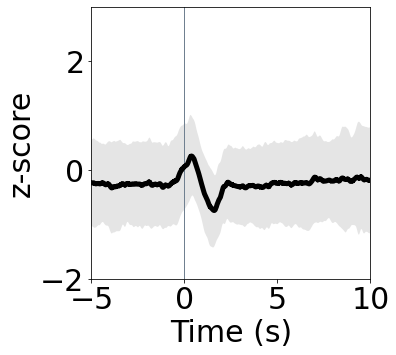

In [138]:
#Movement pixel displacement associated with template-matched photometry events

import numpy as np  # package for scientific computing, handles arrays and math
from operator import add
#Plot behavior, activity events

#User defined parameters
font_size = 30
plot_width = 5
plot_height = 5
xint = 5
ymax_4 = 20
ymin_5 = -2
ymax_5 = 3
j=0

#Movement to arrest
#for i in range(len(behave_mean_marker1_array))

print("\033[1m"+"21. Plot behavior (arrest to movement)..."+"\033[0m")
#for j in range(len(behave_data)):
temp_array=[]
temp_transposed_array=[]
fig,ax4 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
behave_mean_array=behave_mean3_marker1_array #add two markers together
behave_std_array = behave_std3_marker1_array
ax4.axvline(0, color='slategray', linewidth=1)
ax4.plot(behave_interval_time[0],behave_mean_array, color='skyblue', linewidth=5)
ax4.fill_between(behave_interval_time[0], list(map(operator.add,behave_mean_array,behave_std_array)), list(map(operator.sub,behave_mean_array,behave_std_array)), facecolor='skyblue', alpha=0.2)
ax4.set_ylabel('Displacement (px)', fontsize=font_size)
ax4.set_xlabel('Time (s)', fontsize=font_size)
ax4.tick_params(axis="x", labelsize=font_size)
ax4.tick_params(axis="y", labelsize=font_size)
ax4.set_ylim(0,ymax_4)
ax4.set_xlim(-1*pre_window_size,post_window_size)
plt.yticks(np.arange(0, ymax_4+0.01, 10))
plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
#plt.savefig("20230302_LC_behavior_arrest_"+str(pause_interval)+"s_"+str(pause_threshold)+"px_HEAD_predicted.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

fig,ax6 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
ax6.axvline(0, color='slategray', linewidth=1)
ax6.plot(activity_interval_time[0],activity_mean3_array, color='black', linewidth=5)
ax6.fill_between(activity_interval_time[0], list(map(operator.add,activity_mean3_array,activity_std3_array)), list(map(operator.sub,activity_mean3_array,activity_std3_array)), facecolor='gray', alpha=0.2)
ax6.set_ylabel('z-score', fontsize=font_size)
ax6.set_xlabel('Time (s)', fontsize=font_size)
#ax6.axvline(0, color='slategray', linewidth=3)
#ax6.axhline(0, color='slategray', linewidth=3)
ax6.tick_params(axis="x", labelsize=font_size)
ax6.tick_params(axis="y", labelsize=font_size)
ax6.set_ylim(ymin_5,ymax_5)
ax6.set_xlim(-1*pre_window_size,post_window_size)
plt.yticks(np.arange(ymin_5, ymax_5+0.01, 2))
plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
#plt.savefig("20230302_LC_activity_arrest_"+str(pause_interval)+"s_"+str(pause_threshold)+"px_predicted.pdf",bbox_inches = 'tight',dpi=300)
plt.show()


delay:  -236.4956715100866


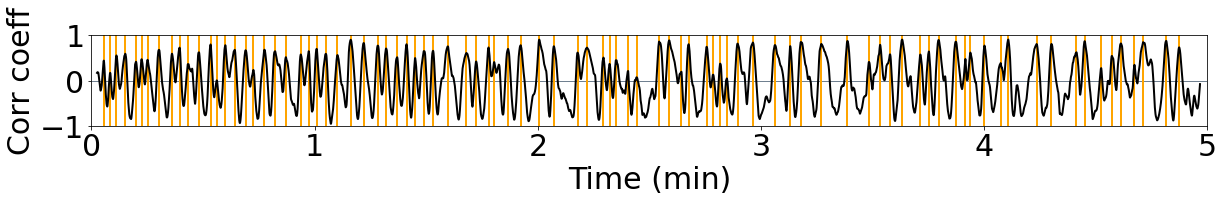

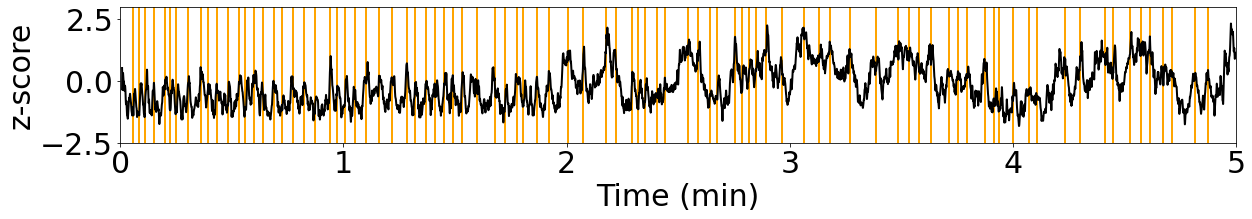

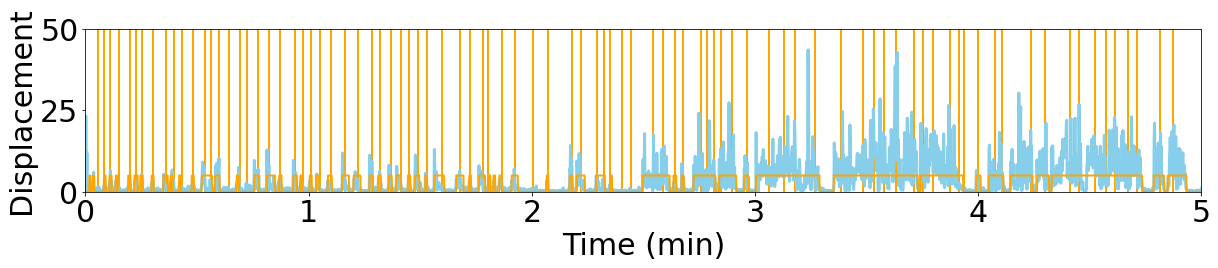

In [139]:
#User defined plot parameters
plot_width_2 = 20
plot_height_2 = 2.5
xmin=0
xmax=5
xint=1
ymin_2=-1
ymax_2=1
yint_2=1

temp = time_470[0:int(hi_cutoff*freq_470)]
temp = temp[::10]
temp = temp[:-temp_size]
print("delay: ", 60-temp[-1])
time_data = [x+analysis_window[0] for x in temp]
time_data_min = [x/60 for x in time_data]
scaled_movement_bin = [1*x/10-1 for x in all_movement_bin]
event3_times_min = [x/60 for x in event3_times]

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2*2/3))
ax2.axhline(0, color='slategray', linewidth=1)
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange',linewidth=2)
#endfor i
#ax2.plot(time_data_min, corr_coeff[pruned_peaks], ".", markersize=10, color='firebrick')
ax2.plot(time_data_min, corr_coeff, color='black', linewidth=2)
#ax2.plot(behave_time_min, scaled_movement_bin, color='orange',linewidth=4)
ax2.set_ylabel('Corr coeff', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_graph_arrest_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

#User defined plot parameters
plot_width_2 = 20
plot_height_2 = 2.5
ymin_2=-2.5
ymax_2=3
yint_2=2.5

scaled_movement_bin = [5*x/10-5 for x in all_movement_bin]
time_470_min = [x/60 for x in time_470]
behave_time_min = [x/60 for x in behave_time]
event3_times_min = [x/60 for x in event3_times]

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange',linewidth=2)
#endfor i
ax2.plot(time_470_min[::10], dF_F[::10], color='black', linewidth=2)
#ax2.plot(behave_time_min, scaled_movement_bin, color='orange',linewidth=4)
ax2.set_ylabel('z-score', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_photometry_arrest_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

#User defined plot parameters
plot_width_2 = 20
plot_height_2 = 3
ymin_2=0
ymax_2=50
yint_2=25

scaled_movement_bin = [x for x in all_movement_bin]

fig,(ax2) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width_2, plot_height_2))
for i in range(len(event3_times_min)):
    ax2.axvline(event3_times_min[i], color='orange',linewidth=2)
#endfor i
ax2.plot(behave_time_min, marker_dist[0], color='skyblue',linewidth=3)
ax2.plot(behave_time_min, scaled_movement_bin, color='orange',linewidth=2)
ax2.set_ylabel('Displacement', fontsize=font_size)
ax2.set_xlabel('Time (min)', fontsize=font_size)
ax2.tick_params(axis="x", labelsize=font_size)
ax2.tick_params(axis="y", labelsize=font_size)
#ax2.axes.get_xaxis().set_visible(False)
ax2.set_xlim(xmin,xmax)
ax2.set_ylim(ymin_2,ymax_2)
plt.xticks(np.arange(xmin, xmax+0.01, xint))
plt.yticks(np.arange(ymin_2, ymax_2+0.01, yint_2))
#plt.savefig("20230302_crosscorrelate_behavior_arrest_ALL.pdf",bbox_inches = 'tight',dpi=300)
plt.show()

# Additional analyses between movement transitions & photometry signals

In [150]:
all_movement_bin = np.load("Archived_figs/20220118_all_movement_bin.npy")

In [154]:
#Detect closest neighbor from a photometry templated-matched event and a movement transition
diff = 0.5

bin_pos = 0
bin_events = []
for i in range(len(all_movement_bin)):
    if(all_movement_bin[i]>0):
        if(bin_pos==0):
            bin_pos=1
            bin_events.append(i/10)
    else:
        bin_pos=0
    #endif
#endfor i
print("binary events:", bin_events)
print("movement events:", np.round(event3_times,1))

#find nearest neighbor
count=0
for i in range(len(event3_times)):
    for j in range(len(bin_events)):
        if(abs(event3_times[i]-bin_events[j])<diff):
            count=count+1
            break
        #endif
    #endfor j
#endfor i
print("Total real events: ", len(bin_events), "Total predicted events: ", len(event3_times), "Count:", count) 
print("Sensitivity or TPR: ", np.round(count/len(bin_events),3))
count2=len(event3_times)-count
print("False positive rate: ", np.round(count2/(count2+300*frate-len(bin_events)),3))


binary events: [1.1, 1.9, 5.0, 6.5, 8.2, 11.5, 13.2, 14.9, 17.8, 21.0, 22.9, 25.2, 28.6, 31.3, 34.9, 40.7, 45.4, 48.8, 52.1, 55.9, 57.8, 60.3, 62.1, 65.2, 69.0, 72.1, 76.4, 78.7, 81.6, 83.6, 86.7, 88.6, 91.4, 93.8, 99.7, 103.2, 105.8, 108.3, 109.7, 111.3, 114.6, 124.0, 130.2, 132.1, 137.3, 141.1, 149.8, 158.1, 160.3, 163.5, 170.4, 177.1, 180.3, 201.2, 224.5, 239.5, 242.9, 248.7, 255.8, 259.8, 287.2, 291.0]
movement events: [  3.3   5.    6.7   9.1  12.   13.5  15.1  18.2  21.7  23.7  25.9  28.9
  32.   33.7  36.   38.5  41.4  43.5  46.5  49.4  52.3  56.3  58.4  60.5
  63.   66.1  69.7  73.2  77.   79.2  82.2  84.7  87.   89.4  91.8  95.8
 100.8 103.4 106.7 108.3 112.  115.4 120.4 124.3 130.7 133.2 137.6 139.3
 141.  144.2 146.5 152.6 155.3 158.6 160.5 165.4 167.1 169.  170.8 173.7
 177.8 183.7 187.8 190.7 196.2 203.2 209.  212.  214.7 217.9 222.8 225.1
 227.7 232.3 234.9 236.3 240.1 244.4 246.4 254.1 258.1 264.8 267.  271.4
 274.3 276.7 280.4 282.7 288.9 292.4]
Total real events:  62 T

In [155]:
#Calculate how close are the photometry template-matched event to a movement transition event 

import pandas as pd

min_dist = []
for i in range(len(event3_times)):
    temp=np.NaN
    for j in range(len(bin_events)):
        if(j==1):
            temp = abs(event3_times[i]-bin_events[j])
        else:
            if(abs(event3_times[i]-bin_events[j])<temp):
                temp=abs(event3_times[i]-bin_events[j])
            #endif
        #endif
    #endfor j
    min_dist.append(np.round(temp,1))
#endfor i

print("Min dist: ", min_dist)
df=pd.DataFrame(min_dist)
df.to_csv('min_dist.csv', header=False)

Min dist:  [1.4, 0.0, 0.2, 0.9, 0.5, 0.3, 0.2, 0.4, 0.7, 0.8, 0.7, 0.3, 0.7, 1.2, 1.1, 2.2, 0.7, 1.9, 1.1, 0.6, 0.2, 0.4, 0.6, 0.2, 0.9, 0.9, 0.7, 1.1, 0.6, 0.5, 0.6, 1.1, 0.3, 0.8, 0.4, 2.0, 1.1, 0.2, 0.9, 0.0, 0.7, 0.8, 3.6, 0.3, 0.5, 1.1, 0.3, 1.8, 0.1, 3.1, 3.3, 2.8, 2.8, 0.5, 0.2, 1.9, 3.3, 1.4, 0.4, 3.3, 0.7, 3.4, 7.5, 10.4, 5.0, 2.0, 7.8, 10.8, 9.8, 6.6, 1.7, 0.6, 3.2, 7.2, 4.6, 3.2, 0.6, 1.5, 2.3, 1.7, 1.7, 5.0, 7.2, 11.6, 12.9, 10.5, 6.8, 4.5, 1.7, 1.4]


In [156]:
import numpy as np
import scipy.stats  

corr_cutoff=0

analysis_window = [1.5,1.5]
hi_cutoff = 300
template = np.load("Archived_figs/20220118_init_template_1_5_1_5.npy")
dF_data = dF_F[0:int(hi_cutoff*freq_470)]
corr_coeff = []
print("template: ", len(template))
print("dF: ", len(dF_data))

sig1 = np.nan_to_num(template[::10])
temp_size = len(sig1)
sig2 = np.nan_to_num(dF_data[::10])
print("sig 1: ", len(sig1))
print("sig 2: ", len(sig2))

scales = [1]
corr_coeff_scaled = []
for j in range(len(scales)):
    sig1_scaled = [x*scales[j] for x in sig1]
    corr_coeff = []
    for i in range(len(sig2)-temp_size):
        temp = scipy.stats.pearsonr(sig1_scaled, sig2[i:i+temp_size])
        corr_coeff.append(temp[0])
    #endfor i
    corr_coeff_scaled.append(corr_coeff)
#endfor j

corr_coeff_scaled = np.transpose(np.asarray(corr_coeff_scaled))
print("Corr len:", len(corr_coeff_scaled))

#convert to array
corr_coeff = []
for j in range(len(corr_coeff_scaled)):
    corr_coeff.append(np.nanmax(corr_coeff_scaled[j]))
#endfor j
corr_coeff=np.asarray(corr_coeff)

#Find peaks
from scipy.signal import find_peaks
peaks, _ = find_peaks(corr_coeff, distance=25)
event3_times = []
print("peaks: ", len(peaks))

temp = time_470[0:int(hi_cutoff*freq_470)]
temp = temp[::10]
temp = temp[:-temp_size]
print("delay: ", 60-temp[-1])
time_data = [x+analysis_window[0] for x in temp]

for i in range(len(peaks)):
    event3_times.append(time_data[peaks[i]])
#endfor i

#Cutoff for peak detection
pruned_peaks=[]
for j in range(len(peaks)):
    if(corr_coeff[peaks[j]]>corr_cutoff):
        pruned_peaks.append(peaks[j])
    #endif
#endfor j

event3_times=[]
for i in range(len(pruned_peaks)):
    event3_times.append(time_data[pruned_peaks[i]])
#endfor i

bin_pos = 0
bin_events = []
for i in range(len(all_movement_bin)):
    if(all_movement_bin[i]>0):
        if(bin_pos==0):
            bin_pos=1
            bin_events.append(i/10)
    else:
        bin_pos=0
    #endif
#endfor i

diff = 0.5
count=0
unique_times = []
for i in range(len(event3_times)):
    for j in range(len(bin_events)):
        if(abs(event3_times[i]-bin_events[j])<diff):
            count=count+1
            unique_times.append(bin_events[j])
            break
        #endif
    #endfor j
#endfor i
unique_times = np.unique(unique_times)
print("pre-count: ", count)
count=len(unique_times)
print("Total real events: ", len(bin_events), "Total predicted events: ", len(event3_times), "Count:", count) 
count2=len(event3_times)-count
print("Correlation coefficient cutoff: ", corr_cutoff)
print("False positive rate: ", np.round(count2/(300*frate-len(bin_events)),3))
print("True positive rate: ", np.round(count/len(bin_events),3))


template:  3052
dF:  305175
sig 1:  306
sig 2:  30518
Corr len: 30212
peaks:  158
delay:  -236.9871915002562
pre-count:  51
Total real events:  62 Total predicted events:  116 Count: 51
Correlation coefficient cutoff:  0
False positive rate:  0.022
True positive rate:  0.823


In [157]:
#Detection based on various peak detection cutoffs

diff = 0.5
#Cutoff for peak detection
corr_cutoff=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1]
for k in range(len(corr_cutoff)):
    pruned_peaks=[]
    for j in range(len(peaks)):
        if(corr_coeff[peaks[j]]>corr_cutoff[k]):
            pruned_peaks.append(peaks[j])
        #endif
    #endfor j

    event3_times=[]
    for j in range(len(pruned_peaks)):
        event3_times.append(time_data[pruned_peaks[j]])
    #endfor j
   
    bin_pos = 0
    bin_events = []
    for j in range(len(all_movement_bin)):
        if(all_movement_bin[j]>0):
            if(bin_pos==0):
                bin_pos=1
                bin_events.append(j/10)
        else:
            bin_pos=0
        #endif
    #endfor j
    #print("binary events:", bin_events)
    #print("movement events:", np.round(event3_times,1))

    #find nearest neighbor
    count=0
    diff = 0.5
    unique_times = []
    for i in range(len(event3_times)):
        for j in range(len(bin_events)):
            if(abs(event3_times[i]-bin_events[j])<diff):
                count=count+1
                unique_times.append(bin_events[j])
                break
            #endif
        #endfor j
    #endfor i
    unique_times = np.unique(unique_times)
    count=len(unique_times)
    count2=len(event3_times)-count
    print("\033[1m"+str(k+1)+". Correlation cutoff: "+str(corr_cutoff[k])+"\033[0m")
    print("Real events: ", len(bin_events), "Predicted events: ", len(event3_times), "Count:", count) 
    print("FPR: ", np.round(count2/(count2+300*frate-len(bin_events)),3), "TPR: ", np.round(count/len(bin_events),3))  
    print()
#endfor k

1. Correlation cutoff: -1
Real events:  62 Predicted events:  158 Count: 56
FPR:  0.034 TPR:  0.903

2. Correlation cutoff: -0.75
Real events:  62 Predicted events:  153 Count: 56
FPR:  0.032 TPR:  0.903

3. Correlation cutoff: -0.5
Real events:  62 Predicted events:  144 Count: 56
FPR:  0.029 TPR:  0.903

4. Correlation cutoff: -0.25
Real events:  62 Predicted events:  136 Count: 55
FPR:  0.027 TPR:  0.887

5. Correlation cutoff: 0
Real events:  62 Predicted events:  116 Count: 51
FPR:  0.022 TPR:  0.823

6. Correlation cutoff: 0.25
Real events:  62 Predicted events:  103 Count: 47
FPR:  0.019 TPR:  0.758

7. Correlation cutoff: 0.5
Real events:  62 Predicted events:  83 Count: 39
FPR:  0.015 TPR:  0.629

8. Correlation cutoff: 0.75
Real events:  62 Predicted events:  57 Count: 33
FPR:  0.008 TPR:  0.532

9. Correlation cutoff: 1
Real events:  62 Predicted events:  0 Count: 0
FPR:  0.0 TPR:  0.0



In [66]:
TP = count
FP = len(event3_times) - count
TN = 300*frate - len(event3_times) - len(bin_events) + count
FN = len(bin_events) - count

In [158]:
all_movement_bin = np.load("Archived_figs/20220118_all_movement_bin.npy")

In [159]:
diff = 0.5

bin_pos = 0
bin_events = []
for i in range(len(all_movement_bin)):
    if(all_movement_bin[i]>0):
            bin_pos=1
    else:
        if(bin_pos==1):
            bin_events.append(i/10)
        #endif
        bin_pos=0
    #endif
#endfor i
print("binary events:", bin_events)
print("predicted events:", np.round(event3_times,1))

#nearest neighbor
count=0
for i in range(len(event3_times)):
    for j in range(len(bin_events)):
        if(abs(event3_times[i]-bin_events[j])<diff):
            count=count+1
            break
        #endif
    #endfor j
#endfor i
print("Total real events: ", len(bin_events), "Total predicted events: ", len(event3_times), "Count:", count) 
print("Sensitivity or TPR: ", np.round(count/len(bin_events),3))
count2=len(event3_times)-count
print("False positive rate: ", np.round(count2/(count2+300*frate-len(bin_events)),3))


binary events: [1.3, 2.4, 5.5, 7.1, 8.7, 12.2, 14.1, 15.5, 18.4, 22.2, 23.4, 25.7, 29.2, 34.1, 36.1, 41.3, 46.7, 51.0, 52.8, 56.9, 58.3, 60.9, 62.9, 66.3, 70.9, 74.0, 77.3, 79.5, 82.4, 84.9, 87.4, 89.8, 91.9, 96.5, 101.7, 103.7, 107.5, 108.9, 110.2, 112.0, 116.3, 124.5, 130.9, 134.3, 139.7, 141.6, 157.1, 158.9, 160.9, 169.4, 175.0, 178.3, 197.4, 223.8, 236.0, 240.7, 246.8, 254.6, 259.1, 284.1, 290.0, 296.0]
predicted events: []
Total real events:  62 Total predicted events:  0 Count: 0
Sensitivity or TPR:  0.0
False positive rate:  0.0


In [69]:
import pandas as pd

min_dist = []
for i in range(len(event3_times)):
    temp=np.NaN
    for j in range(len(bin_events)):
        if(j==1):
            temp = abs(event3_times[i]-bin_events[j])
        else:
            if(abs(event3_times[i]-bin_events[j])<temp):
                temp=abs(event3_times[i]-bin_events[j])
            #endif
        #endif
    #endfor j
    min_dist.append(np.round(temp,1))
#endfor i

print("Min dist: ", min_dist)
df=pd.DataFrame(min_dist)
df.to_csv('min_dist_arrest.csv', header=False)

Min dist:  [1.1, 0.4, 0.5, 0.2, 0.6, 0.5, 0.2, 1.3, 0.4, 1.5, 1.0, 0.1, 0.2, 0.6, 1.6, 0.3, 1.8, 2.3, 0.3, 0.7, 0.3, 0.5, 2.2, 2.0, 1.1, 2.0, 0.3, 2.0, 1.0, 0.2, 0.6, 0.4, 1.0, 0.4, 2.0, 1.6, 1.5, 1.0, 0.9, 0.6, 1.3, 0.7, 1.0, 0.2, 0.4, 1.0, 0.2, 1.9, 2.2, 1.4, 0.9, 2.3, 2.1, 0.4, 1.5, 1.6, 0.5, 0.4, 0.5, 1.5, 2.1, 3.4, 3.7, 0.4, 2.3, 3.1, 2.8, 2.2, 1.9, 1.4, 0.6, 1.5, 2.4, 0.4, 0.6, 1.0, 1.4, 2.2, 2.5, 3.0, 4.3, 4.7, 5.6, 6.1, 6.6, 6.9, 7.6, 7.2, 6.5, 5.6, 5.4, 4.6, 1.9, 0.6, 1.4, 2.8, 3.8, 1.8, 0.3, 1.4, 2.5, 2.0, 1.6, 1.1, 2.3, 2.9, 4.8, 9.4, 7.2, 3.6, 2.4, 1.9, 2.5, 3.4, 3.8, 5.6, 5.9, 7.9, 9.5, 10.2, 10.9, 11.4, 11.8, 13.1, 9.9, 6.8, 6.0, 1.8, 1.2, 0.9, 1.3, 3.2, 3.6, 4.4, 1.0, 0.5, 1.0, 2.7, 2.0, 3.7, 3.1, 2.6, 1.2, 2.1, 1.6, 1.3, 2.4, 2.8, 3.8, 4.2, 5.6, 7.8, 11.1, 12.1, 10.9, 9.8, 9.2, 7.9, 4.5, 3.6, 2.1, 1.7, 2.6, 2.3, 1.8, 1.2, 0.7, 0.5, 2.2]


In [148]:
import numpy as np
import scipy.stats  

corr_cutoff=0

analysis_window = [1.5,2.0]
hi_cutoff = 300
template = np.load("Archived_figs/20220118_arrest_template_1_5_2_0.npy")
dF_data = dF_F[0:int(hi_cutoff*freq_470)]
corr_coeff = []
print("template: ", len(template))
print("dF: ", len(dF_data))

sig1 = np.nan_to_num(template[::10])
temp_size = len(sig1)
sig2 = np.nan_to_num(dF_data[::10])
print("sig 1: ", len(sig1))
print("sig 2: ", len(sig2))

scales = [1]
corr_coeff_scaled = []
for j in range(len(scales)):
    sig1_scaled = [x*scales[j] for x in sig1]
    corr_coeff = []
    for i in range(len(sig2)-temp_size):
        temp = scipy.stats.pearsonr(sig1_scaled, sig2[i:i+temp_size])
        corr_coeff.append(temp[0])
    #endfor i
#    print(j+1, ". ", len(corr_coeff))
#    corr_coeff=np.asarray(corr_coeff)
    corr_coeff_scaled.append(corr_coeff)
#endfor j

corr_coeff_scaled = np.transpose(np.asarray(corr_coeff_scaled))
print("Corr len:", len(corr_coeff_scaled))

#convert to array
corr_coeff = []
for j in range(len(corr_coeff_scaled)):
    corr_coeff.append(np.nanmax(corr_coeff_scaled[j]))
#endfor j
corr_coeff=np.asarray(corr_coeff)

#Find peaks
from scipy.signal import find_peaks
peaks, _ = find_peaks(corr_coeff, distance=25)
event3_times = []
print("peaks: ", len(peaks))

temp = time_470[0:int(hi_cutoff*freq_470)]
temp = temp[::10]
temp = temp[:-temp_size]
print("delay: ", 60-temp[-1])
time_data = [x+analysis_window[0] for x in temp]

for i in range(len(peaks)):
    event3_times.append(time_data[peaks[i]])
#endfor i

#Cutoff for peak detection
pruned_peaks=[]
for j in range(len(peaks)):
    if(corr_coeff[peaks[j]]>corr_cutoff):
        pruned_peaks.append(peaks[j])
    #endif
#endfor j

event3_times=[]
for i in range(len(pruned_peaks)):
    event3_times.append(time_data[pruned_peaks[i]])
#endfor i

bin_pos = 0
bin_events = []
for i in range(len(all_movement_bin)):
    if(all_movement_bin[i]>0):
            bin_pos=1
    else:
        if(bin_pos==1):
            bin_events.append(i/10)
        #endif
        bin_pos=0
    #endif
#print("Bin: ", bin_events)

diff = 0.5
count=0
unique_times = []
for i in range(len(event3_times)):
    for j in range(len(bin_events)):
        if(abs(event3_times[i]-bin_events[j])<diff):
            count=count+1
            unique_times.append(bin_events[j])
            break
        #endif
    #endfor j
#endfor i
unique_times = np.unique(unique_times)
print("pre-count: ", count)
count=len(unique_times)
print("Total real events: ", len(bin_events), "Total predicted events: ", len(event3_times), "Count:", count) 
count2=len(event3_times)-count
print("Correlation coefficient cutoff: ", corr_cutoff)
print("False positive rate: ", np.round(count2/(300*frate-len(bin_events)),3))
print("True positive rate: ", np.round(count/len(bin_events),3))


template:  3560
dF:  305175
sig 1:  356
sig 2:  30518
Corr len: 30162
peaks:  148
delay:  -236.4956715100866
Bin:  [1.3, 2.4, 5.5, 7.1, 8.7, 12.2, 14.1, 15.5, 18.4, 22.2, 23.4, 25.7, 29.2, 34.1, 36.1, 41.3, 46.7, 51.0, 52.8, 56.9, 58.3, 60.9, 62.9, 66.3, 70.9, 74.0, 77.3, 79.5, 82.4, 84.9, 87.4, 89.8, 91.9, 96.5, 101.7, 103.7, 107.5, 108.9, 110.2, 112.0, 116.3, 124.5, 130.9, 134.3, 139.7, 141.6, 157.1, 158.9, 160.9, 169.4, 175.0, 178.3, 197.4, 223.8, 236.0, 240.7, 246.8, 254.6, 259.1, 284.1, 290.0, 296.0]
pre-count:  37
Total real events:  62 Total predicted events:  114 Count: 37
Correlation coefficient cutoff:  0
False positive rate:  0.026
True positive rate:  0.597
